In [2]:
%load_ext autoreload
%autoreload

In [1]:
from utils import *
from wls import *
import matplotlib.pyplot as plt
import ipywidgets as widgets

<class 'numpy.ndarray'>
Image shape: (533, 800, 3)
Data type: uint8


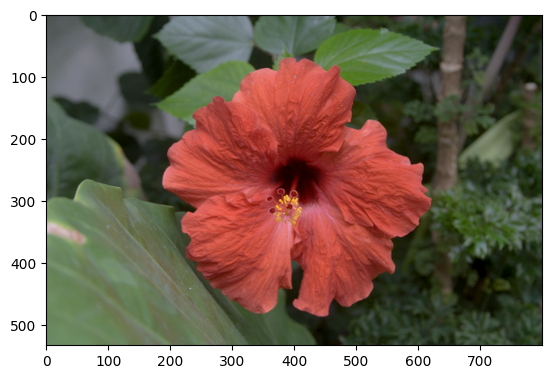

In [ ]:
IMAGE_PATH = "../data/image3.png"

image = load_image(IMAGE_PATH, gray=False, verbose=False)

decomposition = wls(image, 0.35, 1.8, c=4, verbose=True)


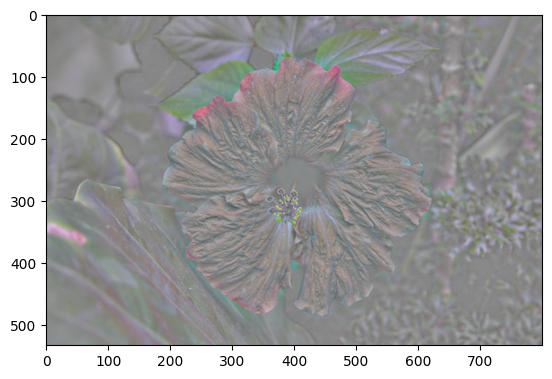

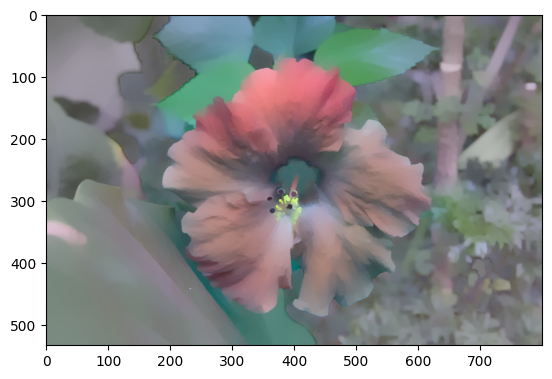

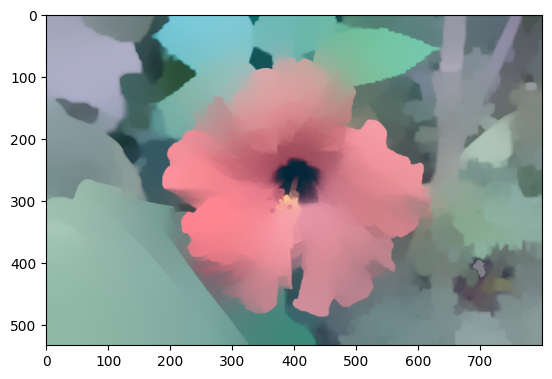

In [ ]:
details = create_detail_layers(decomposition)
base = decomposition[-1]

details_recadred = [recadrage_dynamique(detail, 0, 255) for detail in details] # sert à l'affichage
for img in details_recadred:
    plt.imshow(img)
    plt.show()

In [ ]:
# Create sliders
slider_lst = []
slider_dict = {}  # Dictionary to map valid variable names to sliders
for i in range(len(details)):
    slider = widgets.FloatSlider(value=1, min=0, max=2, step=0.1, description=f"Layer {i+1}")
    slider_lst.append(slider)
    slider_dict[f"layer_{i+1}"] = slider  # Use valid variable names as keys

def update_plot(**kwargs):
    recombined_img = base.copy()  # Ensure base is not modified

    for i, weight in enumerate(kwargs.values()):
        recombined_img += details[i] * weight

    #recombined_img = recadrage_dynamique(recombined_img, 0, 255)
    recombined_img = np.clip(recombined_img, 0, 255)
    plt.imshow(recombined_img.astype(np.uint8))  # Ensure valid image format
    plt.axis('off')
    plt.title("Recombined Image")
    plt.show()

out = widgets.interactive_output(update_plot, slider_dict)

display(widgets.VBox([widgets.HBox(slider_lst), out]))
plt.show()